## Example sheet 1 - solutions

## Question 1.

From the python code, we know that $U \sim U[0, 1]$; so the cumulative distribution function (CDF) of $U$ is:  
$$
{\Pr}_U(u) = \left\{
    \begin{array}\\
        0 & \mbox{if } \ x < 0\\
        x & \mbox{if } \ x \in [0, 1] \\
        1 & \mbox{if } \ x > 1 
    \end{array}
\right.
$$

Assume $Y = U * (1-U)$, then $Y$ is a quadratic equation and $Y \in [0, \frac{1}{4}]$ due to $X \in [0, 1]$.
We next to calculate the CDF of $Y$: 
$$
\begin{aligned}
{\Pr}_{Y}(Y \le y) & = {\Pr}_{Y}\big( U(1-U) \le y \big) \\
                   & = {\Pr}_Y\big( -(U-\frac{1}{2})^2 + \frac{1-4y}{4} \le 0 \big) \\
                   & = {\Pr}_Y\big( (U-\frac{1}{2})^2 \ge \frac{1-4y}{4} \big) \\
                   & = {\Pr}_Y\bigg( U-\frac{1}{2} \ge \sqrt{\frac{1-4y}{4}}\bigg) + {\Pr}_Y\bigg( U-\frac{1}{2} \le -\sqrt{\frac{1-4y}{4}}\bigg) \\ 
                   & = 1 - {\Pr}_Y\bigg( U-\frac{1}{2} \le \sqrt{\frac{1-4y}{4}}\bigg) + {\Pr}_Y\bigg( U-\frac{1}{2} \le -\sqrt{\frac{1-4y}{4}}\bigg) \\ 
                   & = 1 - {\Pr}_Y\bigg( U \le \frac{1}{2} + \sqrt{\frac{1-4y}{4}}\bigg) + {\Pr}_Y\bigg( U \le \frac{1}{2} -\sqrt{\frac{1-4y}{4}}\bigg) \\
                   & = 1 - \bigg( \frac{1}{2} + \sqrt{\frac{1-4y}{4}} \bigg) + \frac{1}{2} -\sqrt{\frac{1-4y}{4}} \\ 
                   & = 1 - 2\sqrt{\frac{1-4y}{4}}  = 1 - \sqrt{1-4y} \}
\end{aligned}
$$
Thus, $Y$'s CDF is: $$
{\Pr}_{Y}(Y \le y) = \left\{
    \begin{array} \\
        1 - \sqrt{1-4y} & \mbox{if} \ y \in [0, \frac{1}{4}] \\
        0 & \mbox{if} \ y < 0 \\
        1 & \mbox{if} \ y > \frac{1}{4}
    \end{array}
\right.
$$
The probability density function (PDF) of $Y$ can be calculated by taking the derivative of $Y$'s CDF w.r.t. variable $y$: 
$$
\frac{d}{dy}{\Pr}_Y(Y \le y) = \left\{
    \begin{array}\\
        \frac{2}{1-4y} & \mbox{if} \ y \in [0, \frac{1}{4}] \\
        0 & \mbox otherwise
    \end{array} 
\right.
$$
The curve of $Y$'s CDF can be plotted using below code: 

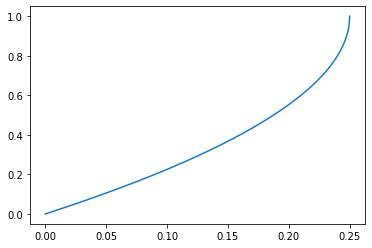

In [29]:
import numpy as np
import matplotlib.pyplot as plt

y = np.linspace(0, .25, 10000)
plt.plot(y, 1 - np.sqrt(1-4*y))
plt.show()

## Question 2.

The log likelihood function of parameter $\lambda$ given a dataset $(x_1, \dots , x_n)$ is: 
$$
\begin{aligned}
\log lik(\lambda \vert x_1, \dots , x_n) & = \sum_{i=1}^n \log \big(\frac{\lambda^{x_i}e^{-\lambda}}{x_i!} \big) \\
    & = \sum_{i=1}^n \big( x_i\log \lambda -\lambda - \log(x_i!)\big) \\
    & = log\lambda\sum_{i=1}^n x_i - n\lambda - n\log(x_i!)
\end{aligned}
$$
To find the maximum likelihood estimator, differentiat w.r.t $\lambda$ where the derivative is equal to zero. So we have the following equation to solve: 
$$
\begin{aligned}
    \frac{d}{d\lambda}\log lik = \frac{1}{\lambda}\sum_{i=1}^n x_i - n = 0
\end{aligned}
$$
So the estimated $\lambda$: 
$$
\hat{\lambda} = \frac{1}{n}\sum_{i=1}^n x_i
$$

## Question 3.

In [11]:
import numpy as np
import scipy.optimize
import scipy.special


def logPr(x, τ):
    λ = np.exp(τ)
    lik = np.power(λ, x) / (np.exp(λ) * scipy.special.factorial(x))
    return np.log(lik)

x = [3, 2, 8, 1, 5, 0, 8]
τ_hat = scipy.optimize.fmin(lambda τ: -np.sum(logPr(x, τ)), 0)

λ_hat = np.log(τ_hat)

print(λ_hat)

Optimization terminated successfully.
         Current function value: 19.033583
         Iterations: 26
         Function evaluations: 52
[0.3000583]


## Question 4.

As $X \sim U[0, 1]$, so we have: 
$$
{\Pr}_X(x;\theta) = \left\{
\begin{array} \\
    \frac{1}{\theta} & \mbox{if} \ x \in [0, \theta] \\
    0 & \mbox otherwise 
\end{array}
\right.
$$

The log likelihood function of parameter $\theta$ given a dataset $(x_1, \dots, x_n)$ is: 
$$
\begin{aligned}
    \log lik(\theta | x_1, \dots, x_n) = \sum_{i=1}^n \log(\frac{1}{\theta}) = -n\log(\theta)
\end{aligned}
$$
To find the maximum likelihood estimator, differentiat w.r.t $\lambda$. So we have the following equation to solve: 
$$
\frac{d}{d\theta}\log lik = -\frac{n}{\theta}
$$
As $\theta > 0$, $\frac{d}{d\theta}\log lik = -\frac{n}{\theta} < 0$, the log likelihood function is a decreasing function of $\theta$. Becasue $(x_1, \dots, x_n)$ are drawn from the uniform distribution $U[0, \theta]$, we have: 
$$
0 \le x_{i={1, \dots, n}} \le \theta
$$
Thus, the maximum value of $\theta$ can only be the maximum value drawn from $(x_1, \dots, x_n)$, which is:
$$
\hat{\theta} = \max_{i=1\dots n}x_i
$$

## Question 5. 

As $X \sim N(\mu, \sigma^2)$ and $Y \sim N(\mu+\delta, \sigma^2)$, the density of $X$ and $Y$ are: 
$$
{\Pr}_X(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^\frac{-(x-\mu)^2}{2\sigma^2}
$$
$$
{\Pr}_Y(y | \mu, \delta, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^\frac{-(y-\mu-\delta)^2}{2\sigma^2}
$$
The log likelihood function of parameters $\mu$, $\delta$, and $\sigma$ given datasets $(x_1, \dots, x_m)$ and $(y_1, \dots, y_n)$ is: 
$$
\begin{aligned}
\log lik(\mu, \delta, \sigma | x_1, \dots, x_m, y_1, \dots, y_n) &= \sum_{i=1}^m\log\big(\frac{1}{\sqrt{2\pi\sigma^2}}e^\frac{-(x_i-\mu)^2}{2\sigma^2}\big) + \sum_{i=1}^n\log\big(\frac{1}{\sqrt{2\pi\sigma^2}}e^\frac{-(y_i-\mu-\delta)^2}{2\sigma^2}\big) \\
&= -\frac{1}{2\sigma^2}\sum_{i=1}^m(x_i-u)^2 - \frac{m}{2}\log2\pi - m\log\sigma -\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i-\mu-\delta)^2 - \frac{n}{2}\log2\pi - n\log\sigma\\
&= -\frac{1}{2\sigma^2}\sum_{i=1}^m(x_i-u)^2 -\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i-\mu-\delta)^2 - \frac{m+n}{2}\log2\pi - (n+m)\log\sigma
\end{aligned}
$$
To find the maximum likelihood estimator, differentiat w.r.t $\mu$, $\delta$ and $\sigma$. So we have the following equations to solve: 
$$
\frac{d}{d\mu}\log lik = \frac{1}{\sigma^2}\big(\sum_{i=1}^m(x_i-u) + \sum_{i=1}^n(y_i-\mu-\delta)\big) = 0 \\
\frac{d}{d\delta}\log lik = \frac{1}{\sigma^2}\sum_{i=1}^n(y_i - \mu - \delta) = 0 \\
\frac{d}{d\sigma}\log lik = \frac{1}{\sigma^3}\sum_{i=1}^m(x_i-\mu)^2 + \frac{1}{\sigma^3}\sum_{i=1}^n(y_i-\mu-\delta)^2-\frac{m+n}{\sigma} = 0
$$
Then we have the estimated parameters $\hat{\mu}$, $\hat{\delta}$ and $\hat{\sigma}$: 
$$
\hat{\mu} = \frac{\sum_{i=1}^m x_i}{m} \\
\hat{\delta} = \frac{\sum_{i=1}^n y_i}{n} - \frac{\sum_{i=1}^m x_i}{m} \\
\hat{\sigma} = \sqrt{\frac{\sum_{i=1}^m(x_i-\overline{x})^2 + \sum_{i=1}^n(y_i-\overline{y})^2}{m+n}}\\
$$
where $\overline{x}=\frac{1}{m}\sum_{i=1}^m x_i, \overline{y}=\frac{1}{n}\sum_{i=1}^n y_i$

## Question 6. 

As $ Y_i \sim Poisson(\lambda x_i)$, 
$${\Pr}_Y(y_i; \lambda) = \frac{(\lambda x_i)^{y_i}e^{-\lambda x_i}}{y_i!}$$
The log likelihood function of parameter $\lambda$ is:
$$
\begin{aligned}
\log lik(\lambda | x_1, \dots, x_n, y_1, \dots, y_n) &= \sum_{i=1}^n\log\frac{(\lambda x_i)^{y_i}e^{-\lambda x_i}}{y_i!} \\ 
&= \sum_{i=1}^n\big(y_i\log(\lambda x_i) - \lambda x_i - \log y_i!\big)
\end{aligned}
$$
To find the maximum likelihood estimator, differentiat w.r.t $\\ambda$. So we have the following equations to solve: 
$$ 
\frac{\sum_{i=1}^n y_i}{\lambda} - \sum_{i=1}^n x_i = 0
$$
So we have the estimated parameter $\hat{\lambda}$: 
$$
\hat{\lambda} = \frac{\sum_{i=1}^n y_i}{\sum_{i=1}^n x_i}
$$

## Question 7.

There are totally four parameters $m_1$, $c_1$, $m_2$, and $c_2$ that needs to be estimated, which can be denoted as ($k$ is the inflection point): 
$$
y = \left\{
\begin{array} \\
      m_1 x + c_1 &  \mbox{if} \ x \le k \\
      m_2 x + c_2 &  \mbox{if} \ x \ge k
\end{array}
\right.
$$
Then we have below equation: 
$$
m_1 k + c_1 = m_2 k + c_2 \Rightarrow c_2 = (m_1 - m_2) k + c_1
$$
Thus, we can have a linear mode with only three parameters $m_1$, $m_2$ and $c_1$:
$$
y = m_1(x+k)\mathbb{1}_{x\le k} + m_2(x-k)\mathbb{1}_{x > k} + 2c_1
$$
The dataset can be fitted to this linear model and estimate the parameters. Referring the code in **Question 8** for the code to fit the model.

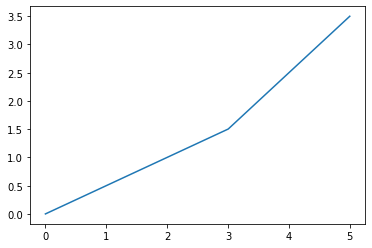

In [3]:
# This code is to plot an example curve of above linear model using the example parameters c1, m1 and m2. 
import numpy as np
import matplotlib.pyplot as plt

def pred(x, m1, c1, m2, inflection_x=3):
    e = np.where(x <= inflection_x, 1, 0)
    return e*(m1*x + c1) + (1-e)*(m2*x + (m1-m2)*inflection_x + c1)

x = np.linspace(0, 5, 1000)

plt.plot(x, pred(x, m1=0.5, c1=0, m2=1))
plt.show()

## Question 8.

The linear model can be formulated as below:
$$
temp \approx \alpha + \beta_1\sin(z\pi t) + \beta_2\cos(2\pi t) + \gamma_1\mathbb{1}_{t=1980s} + \gamma_2\mathbb{1}_{t=1990s} + \gamma_3\mathbb{1}_{t=2000s} + \gamma_4\mathbb{1}_{t=2010s} + \gamma_5\mathbb{1}_{t=2020s}
$$
we can fit this linear model using below python code.

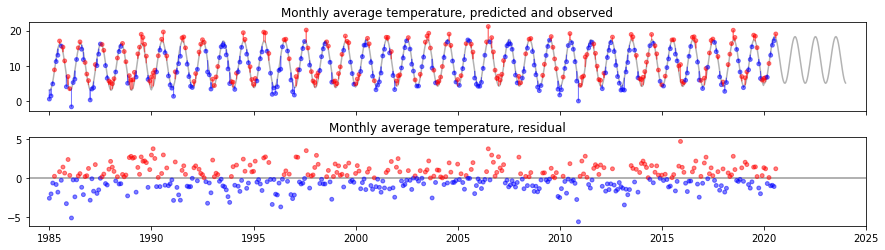

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

url = 'https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/climate.csv'
climate = pd.read_csv(url)

df = climate.loc[(climate.station == 'Cambridge') & (climate.yyyy >= 1985)]
t = df.yyyy + (df.mm-1) / 12
temp = (df.tmin + df.tmax) / 2


# Indicator: step function
def decade_indicator(t, decade):
    return np.where(np.multiply(np.floor(np.divide(t, 10)), 10) == decade, 1, 0)

##### Fit the model 
X = np.column_stack([np.sin(2*np.pi*t), 
                     np.cos(2*np.pi*t), 
                     decade_indicator(t, 1980), 
                     decade_indicator(t, 1990),
                     decade_indicator(t, 2000),
                     decade_indicator(t, 2010),
                     decade_indicator(t, 2020)])
model = LinearRegression()
model.fit(X, temp)

α, (β1, β2, γ1980, γ1990, γ2000, γ2010, γ2020) = (model.intercept_, model.coef_)


##### Predict
pred = model.predict(X)
resid = temp - pred


##### Plot
import matplotlib.pyplot as plt

with plt.rc_context({'figure.figsize': (15, 1.7*2.2), 'figure.subplot.hspace': 0.3}):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

# Top plot: arrows and points
for (t1, pred1, resid1) in zip(t, pred, resid):
    ax1.arrow(t1, pred1, 0, resid1, alpha=0.5, color='blue' if resid1<=0 else 'red')
ax1.scatter(t, temp, s=15, alpha=0.5, c=np.where(resid<=0, 'blue', 'red'))

# and a smooth line to show the fit
newt = np.linspace(1985, 2024, 1000)
newtemp = model.predict(np.column_stack([
        np.sin(2*np.pi*newt), 
        np.cos(2*np.pi*newt),
        decade_indicator(newt, 1980), 
        decade_indicator(newt, 1990),
        decade_indicator(newt, 2000),
        decade_indicator(newt, 2010),
        decade_indicator(newt, 2020)]))
ax1.plot(newt, newtemp, color='0.7', zorder=-1)

# Bottom plot: just the points 
ax2.scatter(t, resid, s=15, alpha=0.5, c=np.where(resid<=0, 'blue', 'red'))
ax2.axhline(0, color='0.6', zorder=-1)

ax1.set_xlim([1984, 2025])
ax1.set_title('Monthly average temperature, predicted and observed')
ax2.set_title('Monthly average temperature, residual')
plt.show()

## Question 9.

Becasue $\sum_{i=0}^2 g_i$ == $\sum_{i=1}^3 e_i$, these five vectors $g_1$, $g_2$, $e_1$, $e_2$ and $e_3$ are **NOT** linearly dependent. 

Here, I also write code to calculate the rank of the matrix $M = (g_1, g_2, e_1, e_2, e_3)$, i.e., $rank(M) = 4$, which is less than the number of vectors. So these five vectors are **NOT** linearly independent. 

It is therefore we can have a linearly independent four vectors by just removing one of vectors from these five vectors, for example, $g_1$, $e_1$, $e_2$ and $e_3$ are linearly independent. 

In [6]:
import numpy as np

g1 = [1, 1, 1, 1, 0, 0, 0]
g2 = [0, 0, 0, 0, 1, 1, 1]
e1 = [1, 1, 0, 0, 1, 0, 0]
e2 = [0, 0, 1, 0, 0, 1, 1]
e3 = [0, 0, 0, 1, 0, 0, 0]

rank = np.linalg.matrix_rank(np.column_stack([g1, g2, e1, e2, e3]))

print(f'Rank={rank}, so they are', 'Linearly dependent' if rank < 5 else 'Linear independent')

# g2 = e1 + e2 + e3 - g1 => g1, e1, e2, e3 are linearly independent
print('Rank is', np.linalg.matrix_rank(np.column_stack([g1, e1, e2, e3])))

Rank=4, so they are Linearly dependent
Rank is 4


## Question 10.

The proposed linear model in Question 10 is: 
$$
\mathbb{1}_{outcome == `find'} = \alpha_{gender} + \beta_{eth}
$$
After one-hot encoding, this linear model can be formulated as: 
$$
\begin{aligned}
\mathbb{1}_{outcome == `find'} &= \alpha_1\mathbb{1}_{gender == 'Female'}  + \alpha_2\mathbb{1}_{gender == 'Male'} + \alpha_3\mathbb{1}_{gender == 'Other'} \\
&+ \beta_1\mathbb{1}_{eth== 'Asian'} + \beta_2\mathbb{1}_{eth== 'White'} + \beta_3\mathbb{1}_{eth== 'Black'} + \beta_4\mathbb{1}_{eth== 'Mixed'} + \beta_5\mathbb{1}_{eth== 'Other'}
\end{aligned}
$$
becasue 
$$\mathbb{1}_{gender \in ('Female', 'Male', 'Other')}$ = $\mathbb{1}_{eth \in ('Asian', 'White', 'Black', 'Mixed', 'Other')}$ = 0
$$
The feature vectores are linearly dependent, so these parameters are **NOT** indentifiable.


One of linear models with identifiable parameters is: 
$$
\begin{aligned}
\mathbb{1}_{outcome == `find'} &= \alpha_1\mathbb{1}_{gender == 'Female'}  + \alpha_2\mathbb{1}_{gender == 'Male'} \\
&+ \beta_1\mathbb{1}_{eth== 'Asian'} + \beta_2\mathbb{1}_{eth== 'White'} + \beta_3\mathbb{1}_{eth== 'Black'} + \beta_4\mathbb{1}_{eth== 'Mixed'} \\ 
&+ \gamma 
\end{aligned}
$$

**Note**: For interpreting parametersm, please watch the lecture video **2.6 Interpreting parameters** at https://www.youtube.com/watch?v=udC0UUOi16A. The steps are: 
1. Write out the predicted response for a few typical/representative datapoints. This helps see what the parameters mean.
2. Write out the features. If two models have different features but the same feature space, then they make the same predictions
3. Check if the features are linearly dependent. If so, the parameters have no intrinsic meaning. We say the features are *confounded*, and the parameters are *non-identifiable*. 

Following these steps, we have below table of typical datapoints: 

Gender | Ethnicity | Predicted $y$
--- | --- | --- 
Other | Other | $$y = \gamma$$
Female | Asian | $$y = \alpha_1 + \beta_1 + \gamma$$
Female | White | $$y = \alpha_1 + \beta_2 + \gamma$$
Female | Black | $$y = \alpha_1 + \beta_3 + \gamma$$
Female | Mixed | $$y = \alpha_1 + \beta_4 + \gamma$$
Male | Asian | $$y = \alpha_2 + \beta_1 + \gamma$$
Male | White | $$y = \alpha_2 + \beta_2 + \gamma$$
Male | Black | $$y = \alpha_2 + \beta_3 + \gamma$$
Male | Mixed | $$y = \alpha_2 + \beta_4 + \gamma$$

So $\gamma$ is the probability of *finding something* when stopping a person with *Other* gender and *Other* Ethnicity. $\alpha_i$ measure the influence of gender on the findinig outcome outcome; and $\beta_j$ measure the influence of ethnicity on the finding outcome. They together can measure the difference, for example: $\mathbb{P}(outcome==`find'; gender=`Other', eth=`Other')$ -  $\mathbb{P}(outcome==`find'; gender=`Female', eth=`Asian')$